Ejercicio 2<br>
Se tiene la variable<br>

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
Venta_de_Periodicos = 0

Se formula la distribución acomulada y los intervalos.

In [4]:
x = random.random()
if 0.0 <= x < 0.20:
    Venta_de_Periodicos = 30
elif 0.20 <= x < 0.45:
    Venta_de_Periodicos = 40
elif 0.45 <= x < 0.70:
    Venta_de_Periodicos = 50
elif 0.70 <= x < 0.90:
    Venta_de_Periodicos = 60
elif 0.90 <= x <= 1.00:
    Venta_de_Periodicos = 70

Se modelan las ventas de un día

Esta simulación se realiza n veces

In [24]:
def Beneficio_diario(Pedido):
	Venta_de_Periodicos = 0
	x = random.random()
	if 0.0 <= x < 0.20:
	    Venta_de_Periodicos = 30
	elif 0.20 <= x < 0.45:
	    Venta_de_Periodicos = 40
	elif 0.45 <= x < 0.70:
	    Venta_de_Periodicos = 50
	elif 0.70 <= x < 0.90:
	    Venta_de_Periodicos = 60
	elif 0.90 <= x <= 1.00:
	    Venta_de_Periodicos = 70

	Beneficio = 0
	Venta_Real = 0
	Ventas_Perdidas = 0
	No_Vendidos = 0
	sv = Venta_de_Periodicos

	if sv > Pedido:
	    Venta_Real = Pedido
	    Ventas_Perdidas = sv - Pedido
	    No_vendidos = 0   
	else:
	    Venta_Real = sv
	    Ventas_Perdidas = 0
	    No_Vendidos = Pedido - Venta_Real
	Venta_Dia = 1.10*Venta_Real - 0.90*Pedido - 0.10*No_Vendidos - 0.20*Ventas_Perdidas
	return Venta_Dia
Beneficio_diario(50)

6.000000000000007

Finalmente, se calculan las probabilidades se almacenan en una lista y se gráfica.

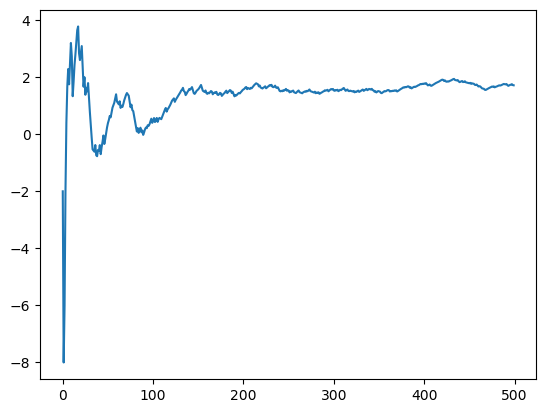

In [28]:
def Simulacion_Gral(n):
    L = []
    Bnficio = 0
    for i in range(n):
        Bnficio += Beneficio_diario(50)
        L.append(Bnficio/(i+1))
    return L

X = Simulacion_Gral(500)
plt.plot(X)
plt.show()

Se calcula la media y la desviación estandar.

In [35]:
def Modelo(n):
    M = []
    for i in range(n):
        M.append(np.mean(Simulacion_Gral(500)))
    return M

Y = Modelo(500)
mean = np.mean(Y)
std = np.std(Y)
print("Media: {:.3f}, Desviación estándar: {:.3f}".format(mean, std))

Media: 1.424, Desviación estándar: 0.525


Se halla el intervalo de confianza con un nivel de aceptación del 95%

In [45]:
from scipy.stats import norm

alpha = 0.05
zest = norm.ppf(1-alpha/2)
print(mean-(zest*std/(50**(1/2))))
print(mean+(zest*std/(50**(1/2))))

1.2784834343880835
1.5697937441458139


Así, el rango de confianza está entre 1.27 y 1.56

c) Se calcula el pedido de periodicos que optimiza el beneficio.